# PCA through Singular Value Decomposition

In [1]:
import numpy as np
# Defined 3 points in 2D-space:
X=np.array([[2, 1, 0],[4, 3, 0]])
# Calculate the covariance matrix:
R = np.matmul(X,X.T)/3
# Calculate the SVD decomposition and new basis vectors:
[U,D,V]=np.linalg.svd(R)  # call SVD decomposition
u1=U[:,0] # new basis vectors
u2=U[:,1]
print(u1)
print(u2)

# Calculate the coordinates in new orthonormal basis:

# Calculate the approximation of the original from new basis
#print(Xi1[:,None]) # add second dimention to array and test it


# Check that you got the original


[-0.40455358 -0.9145143 ]
[-0.9145143   0.40455358]


# PCA on Iris data

In [2]:
# Load Iris dataset as in the last PC lab:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[:])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


<function matplotlib.pyplot.show(close=None, block=None)>

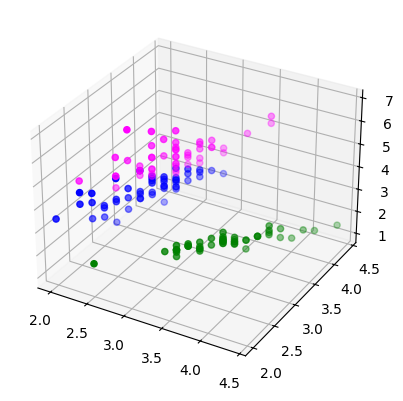

In [3]:
# We have 4 dimensions of data, plot the first three colums in 3D
X=iris.data
y=iris.target
import matplotlib.pyplot as plt
axes1=plt.axes(projection='3d')
axes1.scatter3D(X[y==0,0],X[y==0,1],X[y==0,2],color='green')
axes1.scatter3D(X[y==1,0],X[y==1,1],X[y==1,2],color='blue')
axes1.scatter3D(X[y==2,0],X[y==2,1],X[y==2,2],color='magenta')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

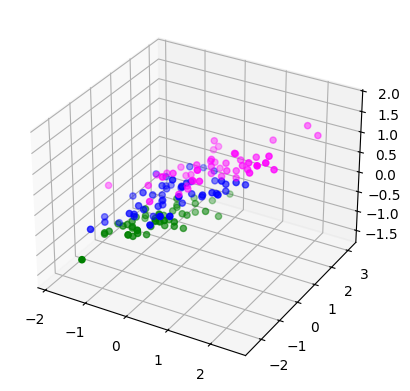

In [4]:
# Pre-processing is an important step, you can try either StandardScaler (zero mean, unit variance of features)
# or MinMaxScaler (to interval from 0 to 1)
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
Xscaler = StandardScaler()
Xpca=Xscaler.fit_transform(X)

# define PCA object (three components), fit and transform the data
# pca = decomposition.PCA(n_components=3)
# pca.fit(Xpp)
# Xpca = pca.transform(Xpp)
# print(pca.get_covariance())
# you can plot the transformed feature space in 3D:
axes2=plt.axes(projection='3d')
axes2.scatter3D(Xpca[y==0,0],Xpca[y==0,1],Xpca[y==0,2],color='green')
axes2.scatter3D(Xpca[y==1,0],Xpca[y==1,1],Xpca[y==1,2],color='blue')
axes2.scatter3D(Xpca[y==2,0],Xpca[y==2,1],Xpca[y==2,2],color='magenta')
plt.show


In [ ]:
# Compute pca.explained_variance_ and pca.explained_cariance_ratio_values
pca.explained_variance_

array([2.93808505, 0.9201649 , 0.14774182])

In [ ]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922])

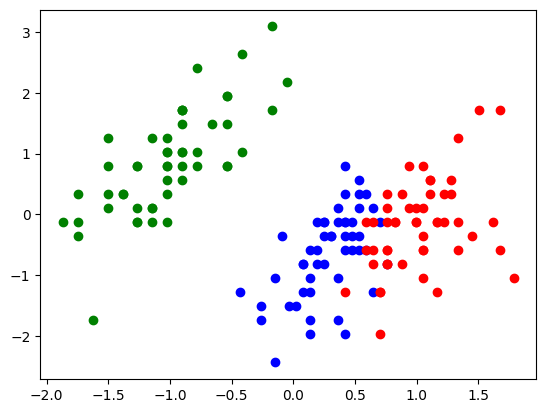

In [6]:
# Plot the principal components in 2D, mark different targets in color

plt.scatter(Xpca[y==0,0],Xpca[y==0,1],color='green')
plt.scatter(Xpca[y==1,2],Xpca[y==1,1],color='blue')
plt.scatter(Xpca[y==2,2],Xpca[y==2,1],color='red')


# KNN classifier

(105, 4)
(45, 4)


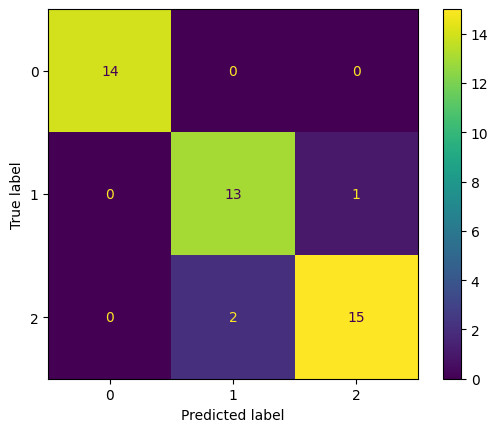

In [5]:

# Import train_test_split as in last PC lab, split X (original) into train and test, train KNN classifier on full 4-dimensional X

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
knn1=KNeighborsClassifier(n_neighbors = 3)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
print(X_train.shape)
print(X_test.shape)
knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train,y_train)
Ypred=knn1.predict(X_test)
# Import and show confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix(y_test,Ypred)
ConfusionMatrixDisplay.from_predictions(Ypred,y_test)


(105, 4)
(45, 4)


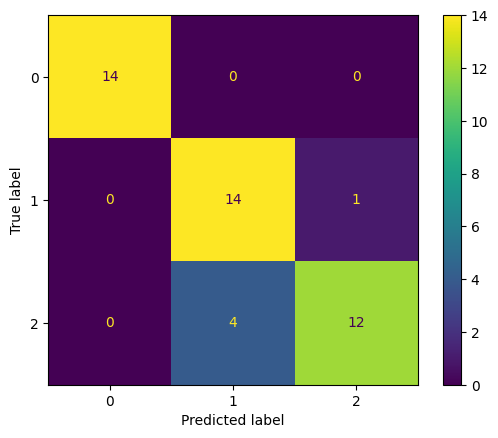

In [7]:

# Now do the same (data set split, KNN, confusion matrix), but for PCA-transformed data (1st two principal components, i.e., first two columns).
# Compare the results with full dataset

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
knn1=KNeighborsClassifier(n_neighbors = 3)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
Xpp_train=Xscaler.fit_transform(X_train)
Xpp_test=Xscaler.fit_transform(X_test)
#ypp_train=Xscaler.fit_transform(y_train)
#ypp_test=Xscaler.fit_transform(y_test)
print(Xpp_train.shape)
print(Xpp_test.shape)
knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(Xpp_train,y_train)
Ypred=knn1.predict(Xpp_test)
# Import and show confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix(y_test,Ypred)
ConfusionMatrixDisplay.from_predictions(Ypred,y_test)

(105, 1)
(45, 1)


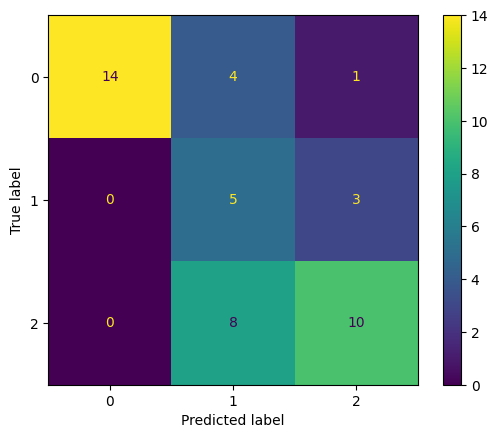

In [8]:
# Now do the same, but use only 2-dimensional data of original X (first two columns)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X[:,0:1],y,test_size=0.3)
print(X_train.shape)
print(X_test.shape)
knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train,y_train)
Ypred=knn1.predict(X_test)
# Import and show confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix(y_test,Ypred)
ConfusionMatrixDisplay.from_predictions(Ypred,y_test)